# Importing Libraries

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from glob import glob
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Importing Data

In [80]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [81]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [82]:
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [83]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [84]:
df.tail(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [85]:
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


In [86]:
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93


# Statistics of Datasets

In [87]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#  Data Cleaning

In [88]:
# rename specific column names
df.rename(columns = {'R': 'RS','H':'1B'}, inplace = True)

In [89]:
df

,W,RS,AB,1B,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [90]:
# check missing data
print("Total number of missing values in each column:")
print(df.isnull().sum())

Total number of missing values in each column:
W      0
RS     0
AB     0
1B     0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


In [91]:
# check duplicated data
print("Total number of duplicates in batting data: {}".format(df.duplicated().sum()))

Total number of duplicates in batting data: 0


In [92]:
# check data types
print(df.dtypes)

W        int64
RS       int64
AB       int64
1B       int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object


In [93]:
# check memory usage
print("Total Memory Usage Before: {}".format(df.memory_usage(deep = True).sum()))

Total Memory Usage Before: 4212


# EDA featuring correaltions and Visualization

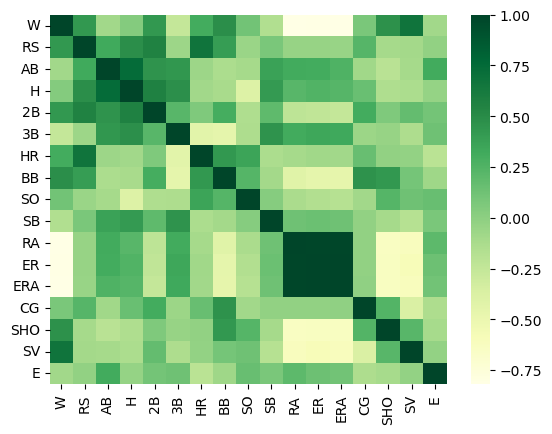

In [22]:
dfmap=sns.heatmap(df.corr(),cmap="YlGn")

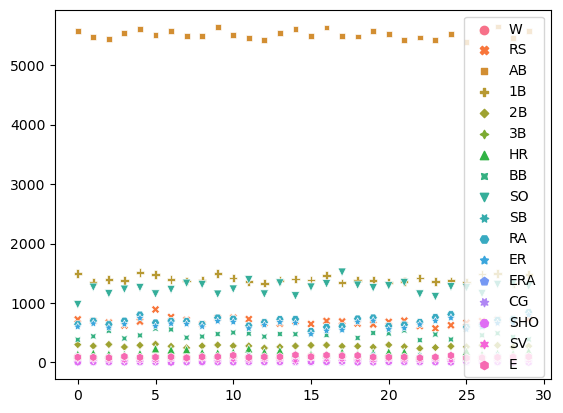

In [96]:
dfmap=sns.scatterplot(df)

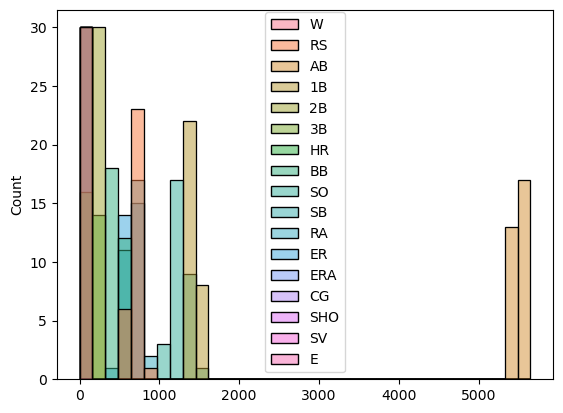

In [98]:
dfmap=sns.histplot(df)

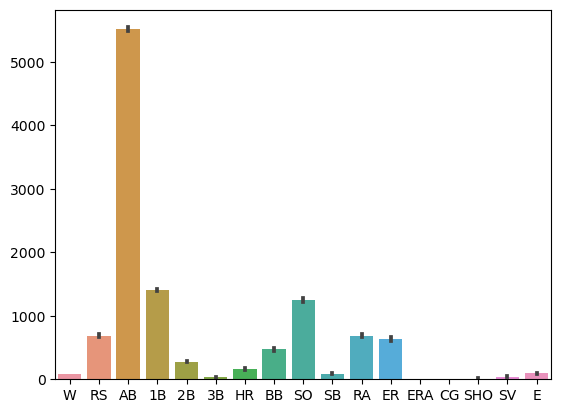

In [99]:
dfmap=sns.barplot(df)

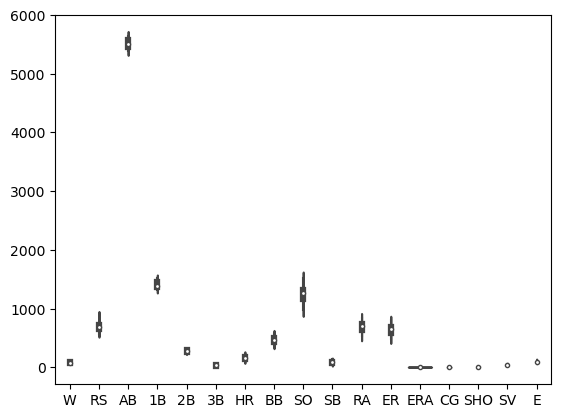

In [100]:
dfmap=sns.violinplot(df)

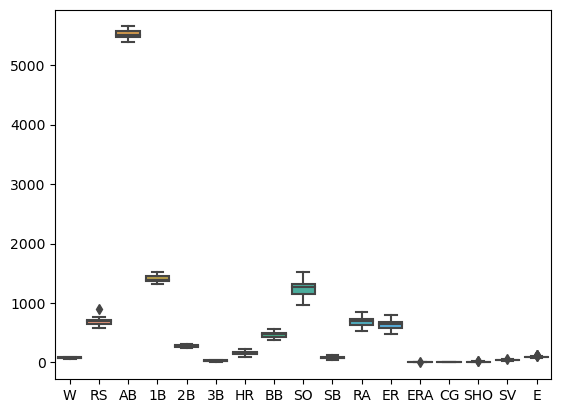

In [101]:
dfmap=sns.boxplot(df)

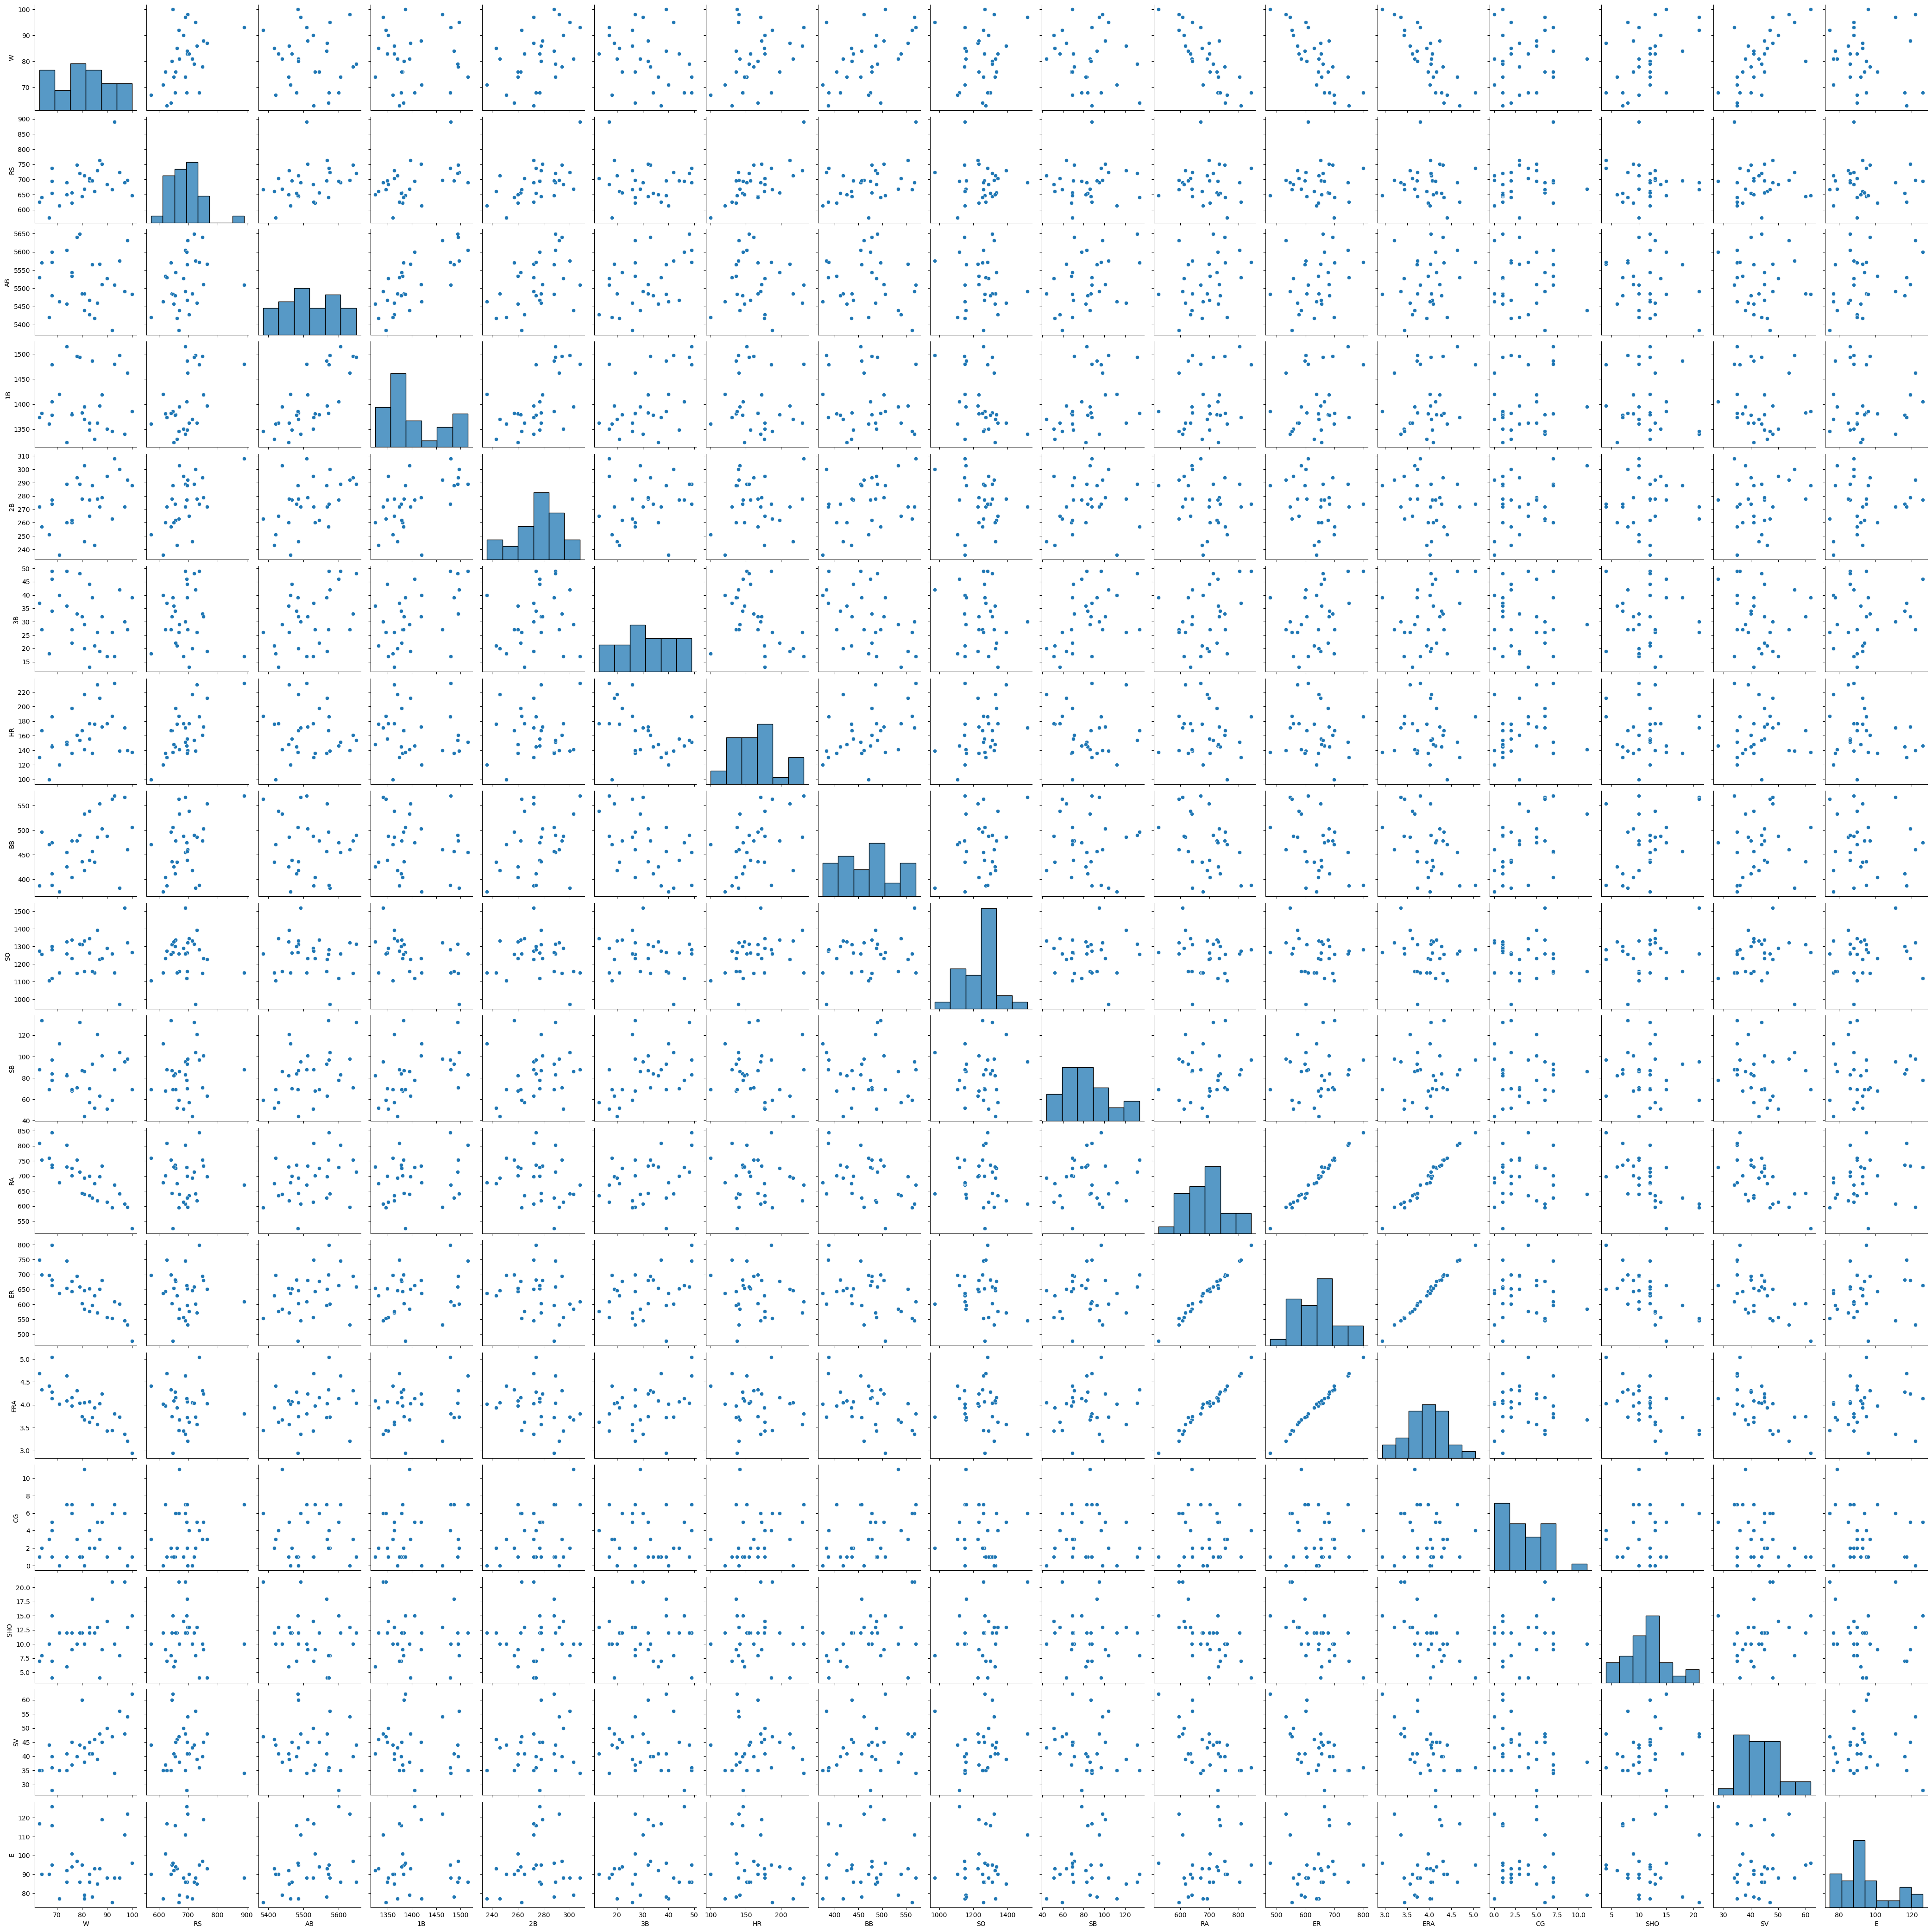

In [102]:
dfmap=sns.pairplot(df)

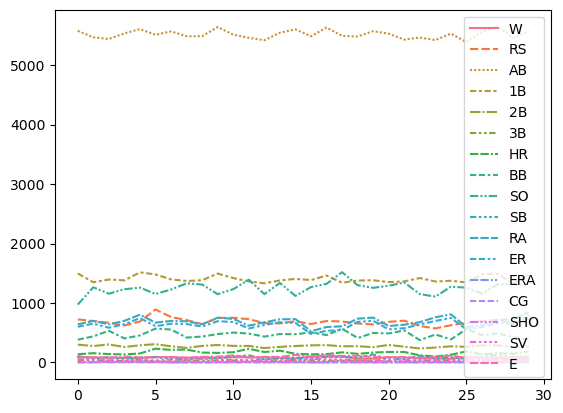

In [103]:
dfmap=sns.lineplot(df)

# Feature Selection

Initial total number of numerical independent variables: 16


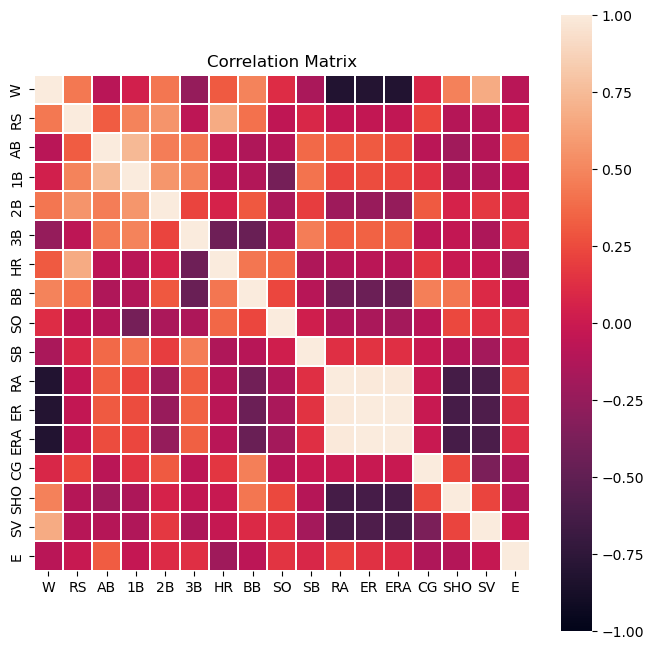

In [104]:
# initial total number of numerical independent variables (i.e., except the response variable "RS")
init_var_num = len(df.select_dtypes(exclude = "category").columns)
print("Initial total number of numerical independent variables: {}".format(init_var_num - 1))

# correlation matrix
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize = (8, 8))

sns.heatmap(corrMatrix, square = True, linewidths = 0.3, vmax = 1, vmin = -1)
plt.title('Correlation Matrix')
plt.show()

In [110]:
# first drop variables that have lower (absolute) correlations with 'RS' than 0.65
corrMatrix = abs(df.corr())
cols = list(corrMatrix.columns)
vars_to_drop = []
for col in cols:
    if corrMatrix[col]['RS'] < 0.65:
        vars_to_drop.append(col)

filtered_df = df.loc[:, ~df.columns.isin(vars_to_drop)]
filtered_vars = list(filtered_df.select_dtypes(exclude = "category").columns)
print(filtered_vars)

['RS', 'HR']


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics

In [125]:
model = linear_model.LinearRegression

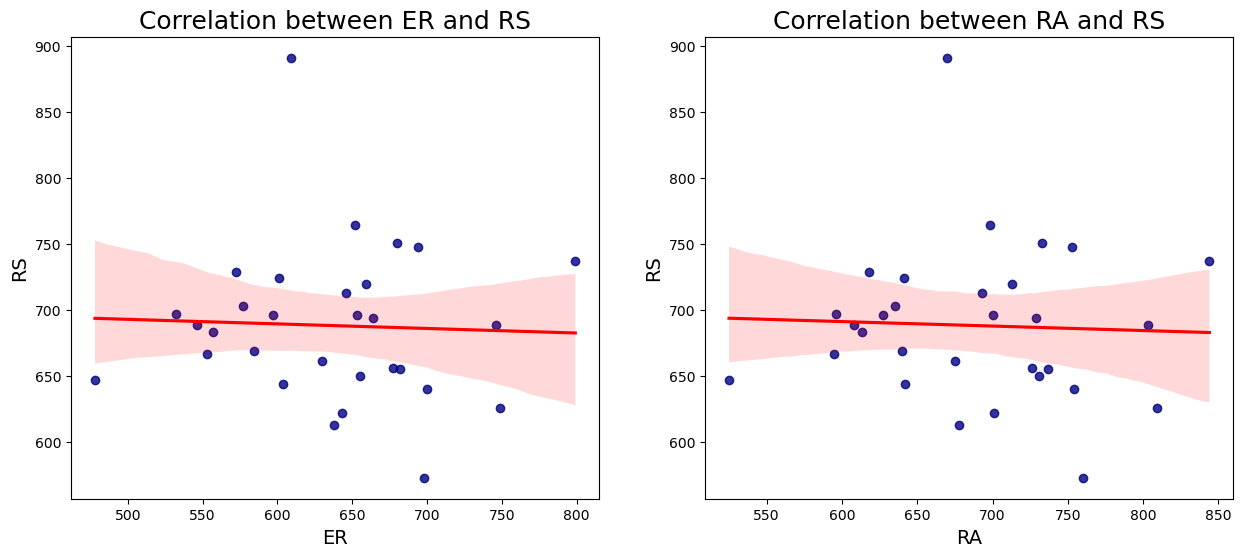

TypeError: residplot() got multiple values for argument 'data'

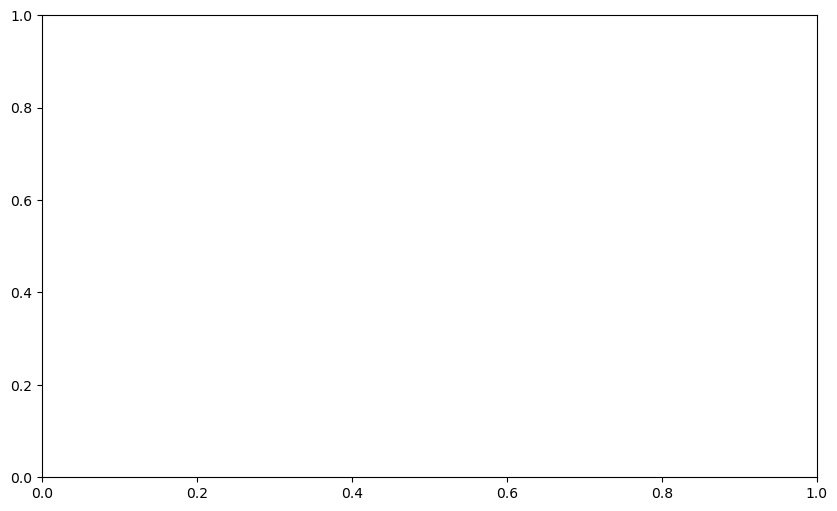

In [130]:
# select final features for multiple linear regression model
mlr_df = df.loc[:, ["RS","ER","RA"]]

# linearity
# scatter plots
cols = list(mlr_df.drop('RS', axis = 1).columns)

fig, axes = plt.subplots(1, 2, figsize = (15, 6))

for col, ax in zip(cols, axes.flatten()[:2]):
    sns.regplot(x = col, y = 'RS', data = mlr_df, scatter_kws = {'color': 'navy'},
                line_kws = {'color': 'red'}, ax = ax)
    ax.set_title('Correlation between {} and RS'.format(col), fontsize = 18)
    ax.set_xlabel(col, fontsize = 14)
    ax.set_ylabel('RS', fontsize = 14)

plt.show()

# homoscedasticity
# residual plot
model = linear_model.LinearRegression().fit(x, y)
fitted_y = model.predict(x)
resid = fitted_y - y

fig = plt.subplots(figsize = (10, 6))
sns.residplot(fitted_y, "RS", data = mlr_df, lowess = True,
              scatter_kws = {"alpha": 0.5}, line_kws = {"color": "red", "lw": 1})
plt.xlabel("Fitted values", fontsize = 14)
plt.ylabel("Residuals", fontsize = 14)
plt.title("Residuals vs Fitted", fontsize = 20)
plt.show()

# normality
# QQ plot
fig = plt.subplots(figsize = (6, 6))
stats.probplot(resid, dist = "norm", plot = plt)
plt.title("Multiple Linear Regression QQ Plot")
plt.show()

# SIMPLE LINEAR REGRESSION

In [136]:
# univariate feature selection (filter method)
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from math import sqrt
num_df = df.select_dtypes(exclude = "category")
x = num_df.loc[:, num_df.columns != 'RS']
y = num_df['RS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

selector = SelectKBest(score_func = f_regression, k = 1)
selected_xTrain = selector.fit_transform(x_train, y_train)
selected_xTest = selector.transform(x_test)

all_cols = x.columns
selected_mask = selector.get_support()
selected_var = all_cols[selected_mask].values

print('Univariate Feature Selection: {}'.format(selected_var))

# regression
x = np.array(df[selected_var]).reshape(-1, 1)
y = df['RS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

lm = linear_model.LinearRegression().fit(x_train, y_train)

y_predicted = lm.predict(x_test)

print('------- Simple Linear Regression (x = {})-------'.format(selected_var))
print("Intercept: {}".format(lm.intercept_))
print("Coefficients: {}".format(lm.coef_))
print("R-squared: {}".format(metrics.r2_score(y_test, y_predicted)))
mse = metrics.mean_squared_error(y_test, y_predicted)
print("RMSE: {}".format(sqrt(mse)))
print("MAE: {}".format(metrics.mean_absolute_error(y_test, y_predicted)))

Univariate Feature Selection: ['HR']
------- Simple Linear Regression (x = ['HR'])-------
Intercept: 482.1287868720309
Coefficients: [1.2608128]
R-squared: -0.06922958878210417
RMSE: 33.7433061327028
MAE: 27.633593616514815


# Model Validation

In [144]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
x = np.array(df['ER']).reshape(-1, 1)
y = df['RS']

cv_r2 = cross_val_score(model, x, y, scoring = "r2", cv = 10)
cv_rmse = -1 * cross_val_score(model, x, y, scoring = "neg_root_mean_squared_error", cv = 10)
cv_mae = -1 * cross_val_score(model, x, y, scoring = "neg_mean_absolute_error", cv = 10)

print("------- Multiple Linear Regression Cross-Validation -------")
print("Mean R-squared: {}".format(cv_r2.mean()))
print("Mean RMSE: {}".format(cv_rmse.mean()))
print("Mean MAE: {}".format(cv_mae.mean()))

------- Multiple Linear Regression Cross-Validation -------
Mean R-squared: -5.071209680793502
Mean RMSE: 54.109980177783726
Mean MAE: 45.56109332554933


CONCLUSION: The estimate data is good ,recognisable and well maintain.facing some issue due to large data in residplot .
as we can see in mean_R_squared is -5 which is not good at all and mean RMSE or mean MAE is positive 

